In [1]:
import os
import shutil

import pandas as pd
import numpy as np
import json 
from os import listdir
from os.path import isfile, join

from scipy import stats

import plotly
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Footprinting

In [2]:
experiment_id = "NS-23.0061"

metadata_subdir = os.path.expanduser("~/fht.samba.data/experiments/ATACseq/{}/analysis/metadata/".format(experiment_id))
print('metadata_subdir exists:{}\n'.format(os.path.exists(metadata_subdir)))

BAM_DIR = os.path.expanduser("~/fht.samba.data/experiments/ATACseq/{}/alignment/bam/".format(experiment_id))
print('BAM_DIR exists:{}\n'.format(os.path.exists(BAM_DIR)))

FOOT_BED_DIR = os.path.expanduser("~/fht.samba.data/experiments/ATACseq/{}/alignment/footprint_bed/".format(experiment_id))
print('FOOT_BED_DIR exists:{}\n'.format(os.path.exists(FOOT_BED_DIR)))

genome = 'hg38' # or mm10

metadata_subdir exists:True

BAM_DIR exists:True

FOOT_BED_DIR exists:True



In [3]:
def create_dir(name_dir):
    # if os.path.exists(name_dir):
    #     shutil.rmtree(name_dir)
    # os.mkdir(name_dir)
    return name_dir

In [4]:
footprint_dir = create_dir("../footprint/")
print(footprint_dir)

../footprint/


In [5]:
def read_contrast(metadata_subdir, experiment_id): 
    
    metadata_files = [f for f in listdir(metadata_subdir) if isfile(join(metadata_subdir, f))]
    print('Files in metadata subdirectory:\n{}\n'.format(metadata_files))

    input_orig_contrast_dir = list(filter(lambda x: ('_contrasts_r' in x and experiment_id in x), metadata_files))[0] 
    contrasts_df = pd.read_table(metadata_subdir + input_orig_contrast_dir, delimiter = '\t', index_col = 0)
    print('input_orig_contrast_dir: {} - shape: {} \n'.format(input_orig_contrast_dir, contrasts_df.shape))  
    
    return contrasts_df

contrasts_df = read_contrast(metadata_subdir, experiment_id)
contrasts_df

Files in metadata subdirectory:
['ATACseq_ARID1AKO_ARID1BKD.csv', 'ATACseq_ARID1AKO_ARID1BKD.txt', 'NS-23.0061_metadata_r12x34.txt', 'ATACseq_ARID1AKO_ARID1BKD.xlsx', 'NS-23.0061_group_dict.json', 'NS-23.0061_contrast_dict.json', 'NS-23.0061_contrasts_r6x3.txt']

input_orig_contrast_dir: NS-23.0061_contrasts_r6x3.txt - shape: (6, 3) 



,test_group,negative_ctrl_grp,file_friendly_name
contrast,,,
ARID1BKD_HCT116 - WT_HCT116,ARID1BKD_HCT116,WT_HCT116,ARID1BKD_HCT116_WT_HCT116
ARID1AKO_HCT116 - WT_HCT116,ARID1AKO_HCT116,WT_HCT116,ARID1AKO_HCT116_WT_HCT116
ARID1AKO_ARID1BKD_HCT116 - WT_HCT116,ARID1AKO_ARID1BKD_HCT116,WT_HCT116,ARID1AKO_ARID1BKD_HCT116_WT_HCT116
ARID1AKO_ARID1BKD_HCT116 - ARID1AKO_HCT116,ARID1AKO_ARID1BKD_HCT116,ARID1AKO_HCT116,ARID1AKO_ARID1BKD_HCT116_ARID1AKO_HCT116
ARID1AKO_ARID1BKD_HCT116 - ARID1BKD_HCT116,ARID1AKO_ARID1BKD_HCT116,ARID1BKD_HCT116,ARID1AKO_ARID1BKD_HCT116_ARID1BKD_HCT116
ARID1BKD_TOV21G - WT_TOV21G,ARID1BKD_TOV21G,WT_TOV21G,ARID1BKD_TOV21G_WT_TOV21G


In [6]:
def read_contrast_dict(metadata_subdir, experiment_id): 
    output_filename = experiment_id + '_contrast_dict.json'
    print("output_filename : {}".format(output_filename))

    output_filepath = os.path.join(metadata_subdir, output_filename)
    print("output_filepath : {}".format(output_filepath))
    
    # Opening JSON file
    with open(output_filepath) as json_file:
        contrast_dict = json.load(json_file)
        
    return contrast_dict

contrast_dict = read_contrast_dict(metadata_subdir, experiment_id)
contrast_dict

output_filename : NS-23.0061_contrast_dict.json
output_filepath : /home/fuzan/fht.samba.data/experiments/ATACseq/NS-23.0061/analysis/metadata/NS-23.0061_contrast_dict.json


{'ARID1BKD_HCT116_WT_HCT116': {'contrast': 'ARID1BKD_HCT116 - WT_HCT116',
  'test_group': {'ARID1BKD_HCT116': ['SRR5876160', 'SRR5876161']},
  'negative_ctrl_grp': {'WT_HCT116': ['SRR5876158', 'SRR5876159']}},
 'ARID1AKO_HCT116_WT_HCT116': {'contrast': 'ARID1AKO_HCT116 - WT_HCT116',
  'test_group': {'ARID1AKO_HCT116': ['SRR5876162', 'SRR5876163']},
  'negative_ctrl_grp': {'WT_HCT116': ['SRR5876158', 'SRR5876159']}},
 'ARID1AKO_ARID1BKD_HCT116_WT_HCT116': {'contrast': 'ARID1AKO_ARID1BKD_HCT116 - WT_HCT116',
  'test_group': {'ARID1AKO_ARID1BKD_HCT116': ['SRR5876164', 'SRR5876165']},
  'negative_ctrl_grp': {'WT_HCT116': ['SRR5876158', 'SRR5876159']}},
 'ARID1AKO_ARID1BKD_HCT116_ARID1AKO_HCT116': {'contrast': 'ARID1AKO_ARID1BKD_HCT116 - ARID1AKO_HCT116',
  'test_group': {'ARID1AKO_ARID1BKD_HCT116': ['SRR5876164', 'SRR5876165']},
  'negative_ctrl_grp': {'ARID1AKO_HCT116': ['SRR5876162', 'SRR5876163']}},
 'ARID1AKO_ARID1BKD_HCT116_ARID1BKD_HCT116': {'contrast': 'ARID1AKO_ARID1BKD_HCT116 - AR

# Differential Footprints calculations

In [ ]:
# #### RUN DURING ALIGNMENT ####
# sample_list = list(metadata_df.index)
# print("sample_list: \n{}\n".format(sample_list))
    
# for sample in sample_list:
#     print("sample path: \n{}\n".format(sample))
    
#     narrowPeak = PEAKS_dir + sample + '.filtered.narrowPeak'
#     print("narrowPeak path: \n{}\n".format(narrowPeak))  
    
#     bam = BAM_DIR + sample + '.small.chrsorted.BAM' 
#     print("bam path: \n{}\n".format(bam))

#     ## 1- Generate bed file ##
#     cmd_bed = """rgt-hint footprinting --atac-seq --paired-end --organism={genome} --output-location={footprint_dir}{contrast}/ --output-prefix={sample} {bam} {narrowPeak}""".format(genome=genome, footprint_dir=footprint_dir, sample=sample, bam=bam, narrowPeak=narrowPeak, contrast=contrast) 
#     # print(cmd_bed)
#     !{cmd_bed}
        
#     ## 2- Finding motifs overlapping with predicted footprints ##
#     cmd_motifs = """rgt-motifanalysis matching --organism={genome} --input-files {footprint_dir}{contrast}/{sample}.bed --output-location={footprint_dir}{contrast}/""".format(genome=genome, footprint_dir=footprint_dir, sample=sample, contrast=contrast) 
#     # print(cmd_motifs)
#     !{cmd_motifs}

In [ ]:
def create_footprint_contrast_dir(contrast):
    footprint_contrast_dir = "../footprint/{}/".format(contrast)
    if os.path.exists(footprint_contrast_dir):
        shutil.rmtree(footprint_contrast_dir)
    os.mkdir(footprint_contrast_dir)
    return footprint_contrast_dir

In [ ]:
for contrast in list(contrast_dict.keys())[4:5]:
    print("\ncontrast: \n{}\n".format(contrast))
    
    negative_ctrl_grp = list(contrast_dict[contrast]['negative_ctrl_grp'].values())[0]
    test_group = list(contrast_dict[contrast]['test_group'].values())[0]
    
    mpbs_files = ','.join([FOOT_BED_DIR +  sample + '_mpbs.bed' for sample in test_group + negative_ctrl_grp])
    # print("mpbs_files: \n{}\n".format(mpbs_files))
    
    bam_files = ','.join([BAM_DIR +  sample + '.small.chrsorted.BAM'  for sample in test_group + negative_ctrl_grp])
    # print("bam_files: \n{}\n".format(bam_files))
    
    conditions = ','.join(np.repeat([list(contrast_dict[contrast]['test_group'].keys())[0] , list(contrast_dict[contrast]['negative_ctrl_grp'].keys())[0]], [len(test_group), len(negative_ctrl_grp)], axis=0))
    print("conditions: \n{}\n".format(conditions))
    
    footprint_contrast_dir = create_footprint_contrast_dir(contrast)
    
    ## 3- generate average ATAC-seq profiles around binding sites of particular TF ##
    cmd_diff = """rgt-hint differential --organism={genome} --bc --nc 30 --lfc 0.1 --mpbs-files={mpbs_files} --reads-files={bam_files} --conditions={conditions} --output-location={footprint_contrast_dir}""".format(genome=genome, mpbs_files=mpbs_files, bam_files=bam_files, conditions=conditions, footprint_contrast_dir=footprint_contrast_dir, contrast=contrast)
    print(cmd_diff)
    print()
    # ! {cmd_diff}

In [ ]:
len(negative_ctrl_grp)

# Footprint Plots

### 1 - Compute logFC and pValue per motif for each contrast

In [7]:
def compute_logFC_on_differential_statistics(footprint_dir, contrast):
    differential_statistics = pd.read_csv(footprint_dir + contrast + '/differential_statistics.txt', sep='\t', index_col=0)#.iloc[:, [0,7,8,9,10,11,12]]
    # display(differential_statistics.head())
    differential_statistics.drop([col for col in differential_statistics if col.startswith('Protection')], axis=1, inplace=True)
    differential_statistics['Motifs'] = [x.rsplit("(")[0] for x in differential_statistics.index]
    differential_statistics['Motifs'] = [x.rsplit(".", 1)[-1] for x in differential_statistics['Motifs']]
    differential_statistics['index'] = differential_statistics['Motifs'] #+ " (N=" + differential_statistics['Num'].astype(str) + ")"
    differential_statistics.set_index('index', inplace=True)
    
    differential_statistics['tTest'] = [stats.ttest_ind(differential_statistics.iloc[i, [1,2]], differential_statistics.iloc[i, [3,4]])[0] for i in np.arange(differential_statistics.shape[0]).tolist()]
    differential_statistics['pVal']  = [stats.ttest_ind(differential_statistics.iloc[i, [1,2]], differential_statistics.iloc[i, [3,4]])[1] for i in np.arange(differential_statistics.shape[0]).tolist()]
    differential_statistics['logFC'] = [np.log2( np.mean(differential_statistics.iloc[i, [1,2]]) / np.mean(differential_statistics.iloc[i, [3,4]])) for i in np.arange(differential_statistics.shape[0]).tolist()]
    # differential_statistics.sort_values(by="pVal", inplace= True)
    differential_statistics.sort_index(inplace=True)
    print('shape of differential_statistics: {}'.format(differential_statistics.shape))
    display(differential_statistics.head(n=2))
    
    differential_statistics.to_csv(footprint_dir + contrast + '/differential_statistics_with_logFC.txt', sep='\t')
    
    return differential_statistics

### 2 - Build volcano plot and heatmap for each contrast

In [8]:
def build_volcano_plot(footprint_dir, contrast, differential_statistics):
    down_logFC_cutoff = -0.25
    up_logFC_cutoff = 0.25
    pVal_cutoff = 0.05

    plt.scatter(x=differential_statistics['logFC'],y=differential_statistics['pVal'].apply(lambda x:-np.log10(x)),s=1,label="Not significant", color="grey")

    # highlight down- or up- regulated genes
    down = differential_statistics[(differential_statistics['logFC']<=down_logFC_cutoff)&(differential_statistics['pVal']<=pVal_cutoff)]
    up = differential_statistics[(differential_statistics['logFC']>=up_logFC_cutoff)&(differential_statistics['pVal']<=pVal_cutoff)]


    plt.scatter(x=down['logFC'],y=down['pVal'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
    plt.scatter(x=up['logFC'],y=up['pVal'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
    texts=[]

    if (up.shape[0]!=0):    
        for i,r in up.iterrows():
            texts.append(plt.text(x=r['logFC'],y=-np.log10(r['pVal']),s=differential_statistics.loc[i, 'Motifs']))
        adjust_text(texts) #,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
        
    if (down.shape[0]!=0):    
        for i,r in down.iterrows():
            texts.append(plt.text(x=r['logFC'],y=-np.log10(r['pVal']),s=differential_statistics.loc[i, 'Motifs']))
        adjust_text(texts) #,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
    plt.xlabel("logFC")
    plt.ylabel("-np.log10(pVal)")
    plt.axvline(down_logFC_cutoff,color="grey",linestyle="--")
    plt.axvline(up_logFC_cutoff,color="grey",linestyle="--")
    plt.axhline(-np.log10(pVal_cutoff),color="grey",linestyle="--")
    plt.legend()    

    
    plt.gcf().set_size_inches(15, 10)

    plt.savefig(footprint_dir + contrast + "/" + contrast+ "_volcano_plot.pdf", dpi=200)
    plt.show()
    


In [9]:
def plot_heatmap(footprint_dir, contrast, differential_statistics):
    
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.set(font_scale=1.4)
    
    # Filter sig motfi and sort by logFC
    heatmap_df = differential_statistics[differential_statistics['pVal'] < 0.05].sort_values(by="pVal").drop(['Num', 'Motifs', "tTest", "logFC", "pVal"], axis=1)
    
       
    
    # heatmap_df = differential_statistics.sort_values(by="pVal").drop(['Num', 'Motifs', "tTest", "logFC", "pVal"], axis=1)
   
    # heatmap_df = differential_statistics.sort_values(by="pVal").drop(['Num', 'Motifs', "tTest"], axis=1)
    # t = [x for x in heatmap_df.columns if not x in {"logFC", "pVal"}]
    # new_col_order = ["logFC", "pVal"] + t
    # heatmap_df = heatmap_df[new_col_order]
    # display(heatmap_df.head())
    # heatmap_df.to_csv(footprint_dir + contrast + '/heatmap_df.txt', sep='\t')                                                   
    
    
    sns.heatmap(heatmap_df[0:10],  linewidths=.5, annot=True)
    # plt.gcf().set_size_inches(10, 5)
    plt.xticks(rotation=45) 
    plt.yticks(fontsize = 11) 

    plt.savefig(footprint_dir + contrast + "/" + contrast+ "_heatmap.pdf", dpi=400)
    plt.show()

ARID1AKO_ARID1BKD_HCT116_WT_HCT116
shape of differential_statistics: (746, 9)


,Num,TC_ARID1AKO_ARID1BKD_HCT116,TC_ARID1AKO_ARID1BKD_HCT116.1,TC_WT_HCT116,TC_WT_HCT116.1,Motifs,tTest,pVal,logFC
index,,,,,,,,,
ALX3,9488,0.020139,0.020207,0.018885,0.018055,ALX3,4.088672,0.054936,0.127216
ARGFX,10521,0.017436,0.017796,0.016946,0.015749,ARGFX,2.028142,0.179727,0.107763


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

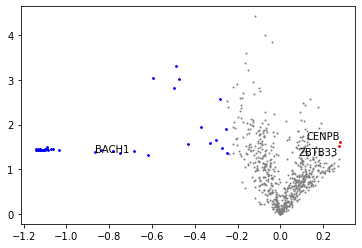

In [10]:
def footprinting_plots(contrasts_df, experiment_id): 

    for contrast in contrasts_df['file_friendly_name'][2:]:
        print(contrast)
        differential_statistics = compute_logFC_on_differential_statistics(footprint_dir, contrast)
        build_volcano_plot(footprint_dir, contrast, differential_statistics)
        # plot_heatmap(footprint_dir, contrast, differential_statistics)

footprinting_plots(contrasts_df, experiment_id)

### 3 - Build heatmap for all contrasts together (logFC and pVal)

In [11]:
def build_output_table_by_direction(contrasts_df, footprint_dir):
    
    diff_stat_results_path = footprint_dir + contrasts_df['file_friendly_name'][0] + '/differential_statistics_with_logFC.txt'
    diff_stat_results_df = pd.read_table(diff_stat_results_path, delimiter = '\t') #, index_col = 0)
    
    logFC_output_table = diff_stat_results_df[['Motifs','logFC']]
    pVal_output_table = diff_stat_results_df[['Motifs','pVal']]    
    logFC_output_table.rename(columns={"logFC": contrasts_df['file_friendly_name'][0]}, inplace=True)
    pVal_output_table.rename(columns={"pVal": contrasts_df['file_friendly_name'][0]}, inplace=True)

    for contrast in contrasts_df['file_friendly_name'][1:]:

        diff_stat_results_path = footprint_dir + contrast + '/differential_statistics_with_logFC.txt'
        if os.path.exists(diff_stat_results_path):

            diff_stat_results_df = pd.read_table(diff_stat_results_path, delimiter = '\t') #, index_col = 0)
            logFC_output_table = pd.merge(logFC_output_table, diff_stat_results_df[['Motifs','logFC']], on='Motifs')
            logFC_output_table.rename(columns={"logFC": contrast}, inplace=True)
            pVal_output_table = pd.merge(pVal_output_table, diff_stat_results_df[['Motifs','pVal']] , on='Motifs')
            pVal_output_table.rename(columns={"pVal": contrast}, inplace=True)

    logFC_output_table.set_index('Motifs', inplace=True)
    pVal_output_table.set_index('Motifs', inplace=True)
    
    display(logFC_output_table.head(2))
    display(pVal_output_table.head(2))
    
    logFC_output_table.to_csv(footprint_dir +'footprint_logFC_r{}x{}.txt'.format(logFC_output_table.shape[0], logFC_output_table.shape[1]), sep='\t')
    pVal_output_table.to_csv(footprint_dir +'footprint_logFC_r{}x{}.txt'.format(pVal_output_table.shape[0], pVal_output_table.shape[1]), sep='\t')


build_output_table_by_direction(contrasts_df, footprint_dir)

/mnt/compbio_tools/miniconda3/envs/NGS_env/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ARID1BKD_HCT116_WT_HCT116,ARID1AKO_HCT116_WT_HCT116,ARID1AKO_ARID1BKD_HCT116_WT_HCT116,ARID1AKO_ARID1BKD_HCT116_ARID1AKO_HCT116,ARID1AKO_ARID1BKD_HCT116_ARID1BKD_HCT116,ARID1BKD_TOV21G_WT_TOV21G
Motifs,,,,,,
ALX3,-0.039759,0.130830,0.127216,-0.022556,0.144569,0.026036
ARGFX,-0.049700,0.104709,0.107763,-0.021665,0.142513,-0.004357


,ARID1BKD_HCT116_WT_HCT116,ARID1AKO_HCT116_WT_HCT116,ARID1AKO_ARID1BKD_HCT116_WT_HCT116,ARID1AKO_ARID1BKD_HCT116_ARID1AKO_HCT116,ARID1AKO_ARID1BKD_HCT116_ARID1BKD_HCT116,ARID1BKD_TOV21G_WT_TOV21G
Motifs,,,,,,
ALX3,0.383395,0.104366,0.054936,0.569847,0.032258,0.898090
ARGFX,0.540041,0.334928,0.179727,0.798011,0.099299,0.986225


### END ###

In [ ]:
def compute_logFC_on_differential_statistics(footprint_dir, contrast):
    differential_statistics = pd.read_csv(footprint_dir + contrast + '/differential_statistics.txt', sep='\t', index_col=0)#.iloc[:, [0,7,8,9,10,11,12]]
    differential_statistics.drop([col for col in differential_statistics if col.startswith('Protection')], axis=1, inplace=True)
    differential_statistics['Motifs'] = [x.rsplit(".", 1)[-1] for x in differential_statistics.index]
    differential_statistics['index'] = differential_statistics['Motifs'] + " (N=" + differential_statistics['Num'].astype(str) + ")"
    differential_statistics.set_index('index', inplace=True)
    
    differential_statistics['tTest'] = [stats.ttest_ind(differential_statistics.iloc[i, [1,2]], differential_statistics.iloc[i, [3,4]])[0] for i in np.arange(differential_statistics.shape[0]).tolist()]
    differential_statistics['pVal']  = [stats.ttest_ind(differential_statistics.iloc[i, [1,2]], differential_statistics.iloc[i, [3,4]])[1] for i in np.arange(differential_statistics.shape[0]).tolist()]
    differential_statistics['logFC'] = [np.log2( np.mean(differential_statistics.iloc[i, [1,2]]) / np.mean(differential_statistics.iloc[i, [3,4]])) for i in np.arange(differential_statistics.shape[0]).tolist()]
    differential_statistics.sort_values(by="pVal", inplace= True)
    
    print('shape of differential_statistics: {}'.format(differential_statistics.shape))
    display(differential_statistics.head(n=2))
    
    differential_statistics.to_csv(footprint_dir + contrast + '/differential_statistics_with_logFC.txt', sep='\t')
    
    return differential_statistics